# Statistics and Probability

## Descriptive Statistics

We are going to use Financial data (Gold and Crude Oil prices) to calculate statistics metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel('Gold_Oil.xlsx',index_col='Date',parse_dates=True)

In [9]:
data.head()

,Gold,Crude Oil
Date,,
2016-06-09,1269.795,50.93
2016-06-10,1273.845,49.39
2016-06-13,1283.810,49.12
2016-06-14,1285.600,48.39
2016-06-15,1291.810,47.96


In [19]:
# We calculate returns

data['Gold_rets'] = data['Gold']/data['Gold'].shift(1) -1
data['Crude_Oil_rets'] = data['Crude Oil']/data['Crude Oil'].shift(1) -1

In [22]:
data.dropna(inplace=True)

In [23]:
data.head()

,Gold,Crude Oil,Gold_rets,Crude_Oil_rets
Date,,,,
2016-06-10,1273.845,49.39,0.003189,-0.030238
2016-06-13,1283.810,49.12,0.007823,-0.005467
2016-06-14,1285.600,48.39,0.001394,-0.014862
2016-06-15,1291.810,47.96,0.004830,-0.008886
2016-06-16,1278.530,46.54,-0.010280,-0.029608


### a) Mean

In [27]:
mean_Gold_rets = data['Gold_rets'].mean()
mean_Oil_rets = data['Crude_Oil_rets'].mean()

In [34]:
print('The average Gold returns is:',round(mean_Gold_rets*100,3),'%')
print('The average Crude Oil returns is:',round(mean_Oil_rets*100,3),'%')

The average Gold returns is: 0.037 %
The average Crude Oil returns is: 0.043 %


### b) Variance and Standard Deviation
The *Variance* describe how the data is spread around the mean. Large Variance means that data points are spread far away from the mean. A small Variance means that the data points are grouped closely around the mean.

In [37]:
Gold_rets_var = np.var(data['Gold_rets'])
Oil_rets_var = np.var(data['Crude_Oil_rets'])

In [43]:
print('The Gold returns variance is:',Gold_rets_var)
print('The Crude Oil returns variance is:',Oil_rets_var)

The Gold returns variance is: 6.884659378054447e-05
The Crude Oil returns variance is: 0.0008770972290907559


*Standard deviation* is simply the square root of the variance

In [44]:
Gold_rets_std = np.sqrt(Gold_rets_var)
Oil_rets_std = np.sqrt(Oil_rets_var)

In [45]:
print('The Gold returns Standard deviation is:',Gold_rets_std)
print('The Crude Oil returns Standard deviation is:',Oil_rets_std)

The Gold returns Standard deviation is: 0.008297384755484373
The Crude Oil returns Standard deviation is: 0.029615827340980293


### c) Covariance and Correlation

The covariance between two variables tells if large values in one variable are associated with large values in the other and, conversely, if small values in one variable are associated with small values in the other.

A **positive covariance** means the the 2 variables varies in the same direction: large values of a variable are associated with large values of the other and small values of a variable are associated with small values of the other;

A **negative covariance** means that large values of a variable are associated with small values of the other;

A **covariance close to 0** means that there is no linear relationship between the variables. 

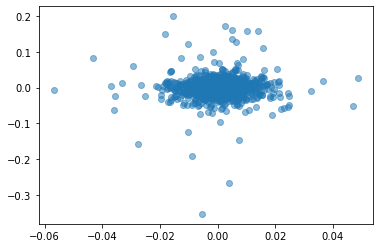

In [50]:
plt.scatter(data['Gold_rets'],data['Crude_Oil_rets'],alpha=0.5)

Visually we can see that doesn't exist a linear relationship between the returns of Gold and Crude Oil.

In [53]:
print('The covariance between Gold and Oil returns is:',np.cov(data['Gold_rets'],data['Crude_Oil_rets']))

The covariance between Gold and Oil returns is: [[6.89056389e-05 2.05115092e-06]
 [2.05115092e-06 8.77849457e-04]]


The functon *np.cov()* returns a *covriance matrix*. The covariance is the value outside of the diagonal: 2.05115092e-06 so approximate 0. On the diagonal of the matrix there is the variance of the variables.

The *correlation* is anormalized version of the covarance. It is scaled between 1 and -1.

In [55]:
print('The correlation between Gold and Oil returns is:',np.corrcoef(data['Gold_rets'],data['Crude_Oil_rets']))

The correlation between Gold and Oil returns is: [[1.         0.00833989]
 [0.00833989 1.        ]]


## Random Variables

### a) Definitions

- A *random experiment* is a process the give you uncertain results.(for instance: coin flip)

- The *outcome* of random experiment is the result you obtain from the experiment. (for instance: 'Head' or 'Tail' in a flip a coin)

- The *Sample* is a set of all possible outcomes. (for instance: if you flip a coin 2 times, the sample space is {heads-heads, heads-tails,tails-heads,tails-tails})

- An *event* is a set of outcomes, a subset of the sample space. Intuitively, it corresponds to a question you can ask about the outcome of a random experiment. (for instance if you roll a dice, you can ask: is the outcome in the set {1,3,6}?)

- The *probability* associated with an event tells you how likely it is to occur.

- A *probability distribution function (PDF)* is a function that maps each outcome to its probability mass (for discrete variables) or to probablty density (for continuous variable) to occur.

- The probability that a random variable $X$ takes the value $x$ is denoted as $P(X=x)$

### b) Probability Distributions

#### - Probability Mass Functions

*Probabiliy mass functions (PMF)* are probability functions of discrete random variables. For instance, in a running a dice-rolling experiment, if you run the experiment a large number of times, you will get each outcome approximately the same number of times. The probability mass function describing X returns $1/6$ for each possible outcome and 0 otherwise:

You can write $P(X=1)=1/6, P(X=2)=1/6$, and so on.

Not every function can be considered as a PMF, 2 conditions are needed:

- $0\le P(x)\le1$
- $\sum P(x) = 1$

In [100]:
# Experiment to roll the dice 20 times
rolls = np.random.randint(1,7,20)
rolls

array([4, 1, 5, 1, 5, 5, 5, 1, 3, 6, 4, 4, 5, 6, 2, 4, 4, 3, 6, 4])

Assuming the die is fair, you should have an *uniform distribution*

In [101]:
val, counts = np.unique(rolls,return_counts=True)

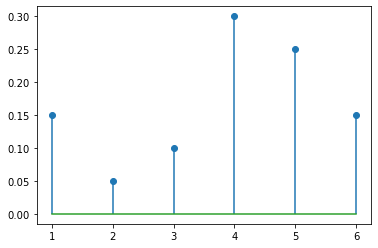

In [102]:
plt.stem(val,counts/len(rolls),basefmt='C2-',use_line_collection=True);

As you can see from the plot if we roll the dice only 20 times the distribution is not uniform.

Now we try to roll the dice 100000 times

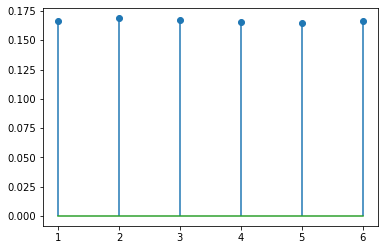

In [107]:
rolls = np.random.randint(1,7,100000)
val, counts = np.unique(rolls,return_counts=True)
plt.stem(val,counts/len(rolls),basefmt='C2-',use_line_collection=True);

With enough trials, the PMF looks uniform

#### - Probability Density Functions

With continuous variables, there is an infinite number of possible outcomes. So the probability of getting a specific point in the distribution is zero.

It is better to consider the probability of getting a specific nummber within a range of values. They-axis of probability density function is not a probability. 

The integral of the probability density function over a particular interval gives the probability that a random variable take a value in this interval. This probability is thus given by the area under the curve in this interval.

denotation of probability density function: $p(x)$

In [123]:
random_cont = np.random.normal(0.5,0.1,1000)

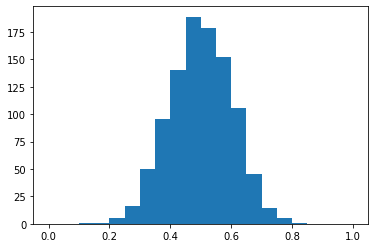

In [130]:
hist = plt.hist(random_cont,bins=20,range=(0,1))

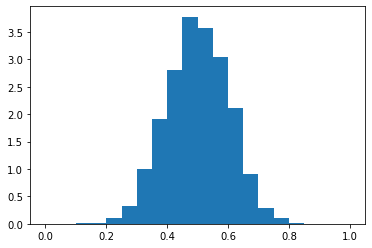

In [131]:
hist = plt.hist(random_cont,bins=20,range=(0,1),density=True)
# Parameter density make the y-axis correspond to the probability density instead of the count of values in each bin

To calculate the probability to have a value in a certain range from the density, you need to use the area under the curve or bars in the case of histogram.

For Instance, we take the range 0.4 to 0.45

In [144]:
print(f'Range x: from {hist[1][8]} to {hist[1][9]}')

Range x: from 0.4 to 0.45


In [143]:
print(f'Density:{round(hist[0][8],4)}')

Density:2.8


Since there are 20 bins and the range of possible outcomes is from 0 to 1, each bar correspond to a range of $\frac{1-0}{20}=0.05$ ; the density from 0.4 to 0.45 is 2.8, so the area of this bar is $2.8 \cdot 0.05 = 0.14$ so the probability is 14%.

The sum of the probabilities must be = 1

In [148]:
sum(hist[0]*0.05)

1.0

Histograms represent a binned version of the probability density function.

Regierement of PDF:

- $p(x)\geq 0$
- $\int_{-\infty}^\infty p(x) \,dx = 1$

**Keep in mind that the value on the y axis of PMF are probabilities, which is not the case for PDF.**

### c) Joint, Marginal, and Conditional Probability

#### - Joint Probability

*Joint probability* is the probablity that 2 or more events occur.

$$P(X=x,Y=y)$$

You must consider the dependence between these events.

**Dependent events** are events that are related in the sense that the probability of one depends on the outcome of the other. For instance, if you randomly pick 2 balls from a bag without replacement, the probabilities associated with the second pick depend on the outcome of the first pick.

**Independent events** are events that don't interfere with each other. For istance, if you roll 2 dice, you don't expect that the outcome of one will affect the outcome of the other.

The joint probability of two independent events is equal to the product of the product of the probability of eache event.

$$P(X=x,Y=y)=P(X=x)P(Y=y)$$

For two dependent events the joint probability is:

$$P(X=x,Y=y)=P(Y=y|X=x)P(X=x)$$



#### - Marginal Probability

In some cases, you'll have the joint probability of multiple events and you'll want to calculate the probability of one of the events individually, without considering the others. Such probabilities are called *marginal probabilities*.

**The sum rule:** Marginal probabilities are obtained adding joint probabilities:

$$P(X=x)=\sum_y P(X=x,Y=y)$$

For instance take the experiment of roll a dice and flip a coin. The marginal probability of X=6 is the sum of the following joint probabilities: $P(X=6,Y='heads')=\frac{1}{6} \cdot \frac{1}{2}= \frac{1}{12}$ and $P(X=6,Y='tails')=\frac{1}{6} \cdot \frac{1}{2}= \frac{1}{12}$.

$$\frac{1}{12} + \frac{1}{12}  = \frac{1}{6}$$

**Marginal Probability Density Functions:** In the case of continuous variables, you calculate the marginal probabilities by integrating the joint probability distribution with respet to one of the variables. To find the marginal probability density of Y, you'll need to integrate with respect to X, meaning that you consider Y as a constant. Graphically, it corresponds to do slices on the x-axis at different values of Y. The area under the curve of each slice corresponds to a point in the probability density function. If you repeat this for all values of Y, you get the whole probability density distribution: the probability density function of Y is costructed as the areas of the slices.

So to go from the joint probability distribution to the marginal probability distribution, you calculate the integral of the joint probability distribution $p(x,y)$ with respect to one of the variable, such as:

$$p(y) = \int p(x,y)dx$$
$$p(x) = \int p(x,y)dy$$

In [234]:
import math
def gaussian(x, mu, sig):
    return (1./(sig*(math.sqrt(2*math.pi))))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x,y= np.mgrid[0:1:0.01,0:1:0.01]
xy= np.column_stack([x.flat,y.flat])

z = gaussian(xy[:,0],0.4,0.1) * gaussian(xy[:,1],0.6,0.05) 
z = z.reshape(x.shape)

z.shape

(100, 100)

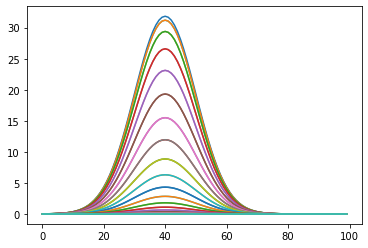

In [235]:
plt.plot(z);

You can extract slices from z with for instance z[:0], which is the first slice, corresponding to Y=0. Slices are separated by 0.01.

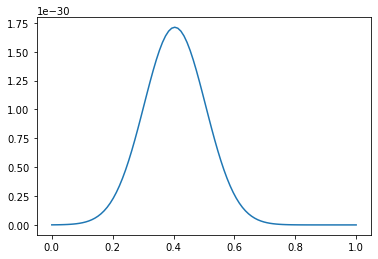

In [236]:
x_axis = np.linspace(0,1,z.shape[0])
plt.plot(x_axis,z[:,0])

We can calculate the area under the curve. This value is the area under the curve of the first slice

In [237]:
(z[:,0]*0.01).sum()

4.292658322616401e-31

This value is the area under the curve of first slice

Now let's do this for every slice

In [238]:
estimated_probability_density = np.zeros(x_axis.shape[0])

for i in range(z.shape[1]):
    slice_area = (z[:,i]*0.01).sum()
    estimated_probability_density[i] = slice_area

Let's compare what you obtain with the true density distribution that you got as *density_y*

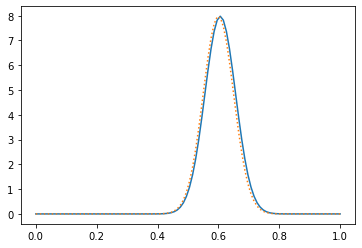

In [244]:
density_y = gaussian(x_axis,0.6,0.05)

plt.plot(x_axis,estimated_probability_density,label='Estimated')
plt.plot(x_axis,density_y,linestyle=':',label='True')

**You can see that these two density functions are quite identical, showing that the marginal probability density function can be obtained from the joint probability distribution.**

#### - Conditional Probability

*Conditional probability* is the probality of an event given that another event has occurred.

$$P(Y=y|X=x)$$

**The Product Rule of Probability:** $$P(X=x,Y=y)=P(Y=y|X=x)P(X=x)$$

$$P(Y=y|X=x)= \frac{P(X=x,Y=y)}{P(X=x)}$$

**More Events:** $$P(A,B,C)=P(A|B,C)P(B|C)P(C)$$

### d) Cumulative Distribution Functions

*Cumulative distribution functions* (CDF) correspond to the probability that a random variable will take a value less than or equal to the value x.
$$F_X(x) = P(X\leq x)$$

Cumulative distribution functions are always non-decreasing going from 0 to 1.

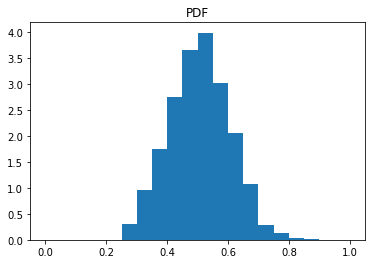

In [258]:
random_cont = np.random.normal(0.5,0.1,1000)
hist = plt.hist(random_cont,bins=20,range=(0,1),density=True)
plt.title('PDF');

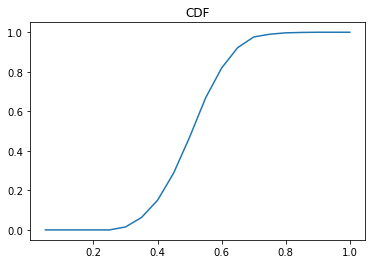

In [303]:
plt.plot(hist[1][1:],(hist[0]/20).cumsum())
plt.title('CDF');

### e) Expectaton and Variance of Random Variables

#### - Expected Value

*Expected value* of a random variable is the average value you'll get when you consider a large number of trials.

**Discret random variables:** $E[X]=\sum_{i=1}^{n}P(x_i)x_i$

**Continuous Random Variables:** $E[X]=\int p(x)x dx$

##### - Variance of Random Variables

The *Variance* of a random variable is a metric describing the spread of the possible outcomes of the variable.

$Var(X)= E[(X-E[X])^2]$